In [15]:
import numpy as np
import numpy.linalg as LA

import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 2. 기계학습 End-to-End

## 데이터 과학을 위한 수학

## Linear Algebra
- handson-ml 참고
- *Linear Algebra*는 *vecter space, linear transfomations between vector spaces, such as rotating a shape, scaling it up or down, translating it* 등을 연구하는 수학의 학문이다.
- *Machine Learning*은 **선형대수학**에 의존하기 때문에 *Linear Algebra*를 이해하는 것은 필수 과정이다.

## Vectors
### Definition
- Vector는 크기와 방향으로 정해지는 quantity이다. 3차원의 vector는 다음과 같이 표기한다.

$v = \begin{pmatrix}
10 \\
50 \\
5000 \\
\end{pmatrix}$

- 위의 vector는 10, 50, 5000의 3개의 원소를 가진다. 이는 3차원 공간의 점의 좌표로 이해할 수 있다. 
- 즉, N개의 원소를 가지는 list는 N차원 공간의 좌표로 표시할 수 있다는 얘기이다. 
- 1개의 원소를 가지는 vector는 1차원의 축에서 점으로 표시되고, 
- 2개의 원소를 가지는 vector는 2차원의 평면에서 점이나 선으로 표시되며, 
- 3개의 원소를 가지는 vector는 공간에서 점이나 선, 면으로 표시된다.
- 이는 귀납적으로 N차원까지 진행된다. (고차원에서는 머리 속으로 그리기 힘들다.)

###  Purpose
- Vector는 기계학습에서 많은 목적을 가지고 있고 대표적으로 관찰과 예측에서 주로 활용된다. 
- 한 가지 예로, 기계학습으로 video를 good, spam, clickbait의 3가지 범주로 분류하는 문제를 풀어보자. 
- 각 vedio에 대해 우리가 다음과 같은 vector를 가지고 있다고 가정한다.

$video = \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$

- 이 vector는 10.5분짜리 비디오이지만 1분 이상 시청한 사람이 전체의 5.2%밖에 되지 않고, 
- 평균적으로 하루에 3.25번 시청하고 spam으로 7번 신고되었다. 당신이 볼 수 있듯이, 각 축은 각각 다른 의미를 가진다.

- Machine learning으로 이 비디오가 어느 범주에 분류될 지 예측해보니 
- 80%의 확률로 spam vedio, 18%로 clickabit, 2%로 good vedio일 것이라고 예측되었다.
- 이는 다음과 같이 쓸 수 있다.

$class probabilities = \begin{pmatrix}
0.02 \\
0.80 \\
0.18
\end{pmatrix}= \begin{pmatrix}
good \\
spam \\
clickbait
\end{pmatrix}$

## Vector in python
파이썬에서 vector는 표준 파이썬의 자료 유형인 list로 표현이 가능하다.

In [11]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

- 파이썬의 list는 입력된 값을 저장하는 것이 아닌 자료의 주소값을 저장한다. 
- 때문에 size가 커지면 주소값을 호출하는 시간이 굉장히 오래걸린다. 
- 때문에 빠른 과학 계산을 위해 Numpy의 `ndarray`를 사용한다. 
- array는 한 가지 자료 유형밖에 저장을 못하지만 각 값들을 붙여서 저장하기 때문에 빠른 벡터 계산을 위해 필수적으로 사용된다.

In [12]:
video = np.array([10.5, 5.2, 3.25, 7.0]) # numpy의 array객체에 iterable한 객체를 넣어 호출한다.
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

vector의 size는 `size` 메서드를 사용하여 얻을 수 있다.

In [13]:
video.size

4

vector $\textbf{v}$의 $i^{th}$ 원소는 $\textbf{v}_i$으로 표기한다.

Note that 
- 수학에서 원소는 흔히 1부터 센다. 그러나 python에서는 index가 0부터 시작하기 때문에 
$\textbf{video}_3$를 얻기 위해서 다음과 같이 indexing한다.

In [14]:
video[2] # 3번째 원소

3.25

## plotting vectors
- vector를 그리기 위해 *matplotlib* 라이브러리를 활용한다.

### 2D vectors

In [16]:
# 2D vectors
u = np.array([2, 5])
v = np.array([3, 1])

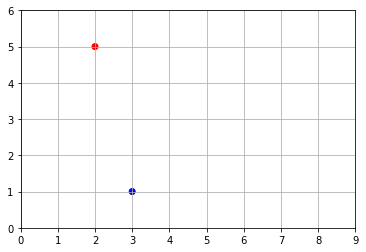

In [18]:
# plotting on a 2D graph
x_coords, y_coords = zip(u, v) # unpacking
plt.scatter(x_coords, y_coords, 
            color=["r","b"])
plt.axis([0, 9, 0, 6]) # xlim=[0, 9], ylim=[0, 6]
plt.grid()
plt.show()

vector는 화살표로도 표현할 수 있다. 이에 관한 함수를 만들어서 그려보자.

In [19]:
def plot_vector2d(vector2d, origin=[0,0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
                    head_width=.2, head_length=.3, length_includes_head=True,
                    **options)

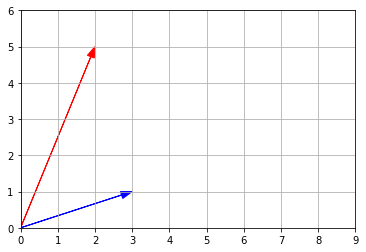

In [20]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### 3D vectors
- 3D plotting을 위해 matplotlib의 `Axes3D`를 사용한다.

In [21]:
# 3D vectors
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

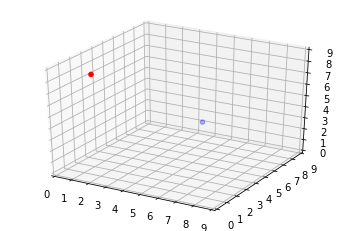

In [27]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords,
                 color=['r','b'])
subplot3d.set_xlim3d([0, 9])
subplot3d.set_ylim3d([0, 9])
subplot3d.set_zlim3d([0, 9])
plt.show()

3차원에서 점으로만 찍히면 위치를 정확히 알기 어려우므로 xy평면에 사영시켜서 위치를 확인해보자

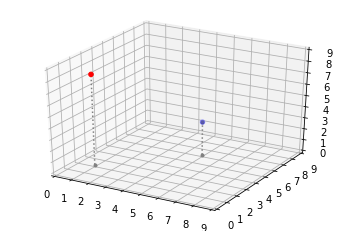

In [30]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_xlim3d([0, 9])
subplot3d.set_ylim3d([0, 9])
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

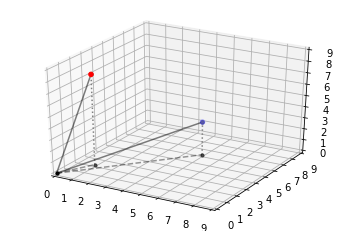

In [50]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([0,x], [0,y], [z0, z], color="k", linestyle='-', marker=".", alpha=.5)
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
        ax.plot([0,x], [0,y], [z0, 0], color="k", linestyle='--', marker=".", alpha=.4)
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_xlim3d([0, 9])
subplot3d.set_ylim3d([0, 9])
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## 벡터: 덧셈과 뺄셈
- list로 vector를 구현할 경우, 단순 덧셈은 extend와 동일하다.
    - 때문에 벡터 덧셈 및 뺄셈을 구현할 경우, list comprehension으로 더해야한다.
- ndarray로 vector를 구현한 경우, 덧셈 및 뺄셈은 *elementwisw*로 일어나게 된다.

In [75]:
a = [1, 2, 3]
b = [4, 5, 6]
print("python list addition :\t\ta + b =", a + b)
a.extend(b)
print("    >> it is same to :\t  a.extend(b) =", a)
a = [1, 2, 3]
print("python list comprehension :\ta + b =", 
     [i + j for i, j in zip(a, b)])

python list addition :		a + b = [1, 2, 3, 4, 5, 6]
    >> it is same to :	  a.extend(b) = [1, 2, 3, 4, 5, 6]
python list comprehension :	a + b = [5, 7, 9]


In [62]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(a + b) # elementwise

[5 7 9]


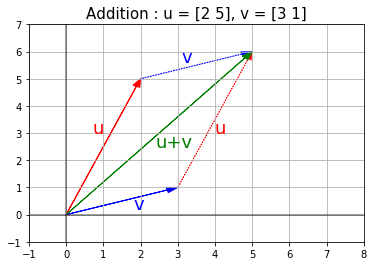

In [85]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([-1, 8, -1, 7])
plt.axvline(color='k', alpha=.5)
plt.axhline(color='k', alpha=.5)
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.title('Addition : u = {}, v = {}'.format(u, v), fontsize=15)
plt.grid()
plt.show()

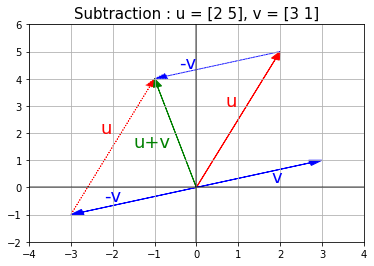

In [138]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(-v, color="b")

plot_vector2d(-v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=-v, color="r", linestyle="dotted")
plot_vector2d(u-v, color="g")
plt.axis([-4, 4, -2, 6])
plt.axvline(color='k', alpha=.5)
plt.axhline(color='k', alpha=.5)
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(-2.3, 2, "u", color="r", fontsize=18)
plt.text(-0.4, 4.4, "-v", color="b", fontsize=18)
plt.text(-2.2, -0.5, "-v", color="b", fontsize=18)
plt.text(-1.5, 1.5, "u+v", color="g", fontsize=18)
plt.title('Subtraction : u = {}, v = {}'.format(u, v), fontsize=15)
plt.grid()
plt.show()

- Vector addition은 교환법칙과 결합법칙을 만족시킨다.
    - Commutative law (교환법칙)
    $$\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$$
    - Associative law (결합 법칙)
    $$\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$$
- Substraction은 성립하지 않는다.
    - 이는 방향이 반대인 vector를 더하는 것과 같다.

## 백터: Scalar Addition & Multiplication

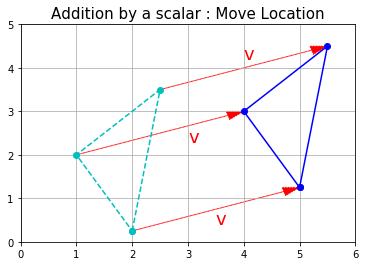

In [141]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()

plt.title('Addition by a scalar : Move Location', fontsize=15)
plt.show()

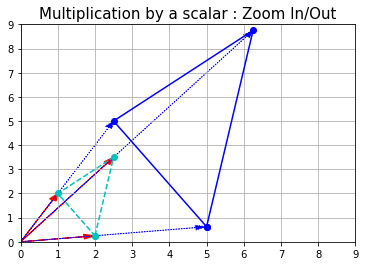

In [144]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.title('Multiplication by a scalar : Zoom In/Out', fontsize=15)

plt.show()

- Scalar Multiplication은 교환법칙, 결합법칙, 분배법칙을 반족시킨다.
    - Commutative
    $$\lambda \times \textbf{u} = \textbf{u} \times \lambda$$
    - Associative
    $$\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$$
    - Distributive
    $$\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$$

## Norm
- vector $\textbf{u}$의 norm은 $\left \Vert \textbf{u} \right \|$로 표기하고, 이는 $\textbf{u}$의 길이를 의미한다. 
- 거리공간에서 다양한 norm measure(taxi-cab, discrete)등이 존재하지만 가장 흔하게 사용하는 것은 Euclidean norm이며 이는 다음과 같이 정의된다;

$$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$$

- 우리는 이를 python에서 쉽게 구현할 수 있으며 root는 다음과 같이 계산한다. $\sqrt x = x^{\frac{1}{2}}$

In [145]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

- 위의 함수를 Numpy의 `norm` 함수를 사용하여 더 빠르게 구할 수 있다.
- numpy의 선형대수 관련 함수들을 `linalg` (**Lin**ear **Alg**ebra) 모듈에서 접근할 수 있다.

In [146]:
LA.norm(u)

5.385164807134504

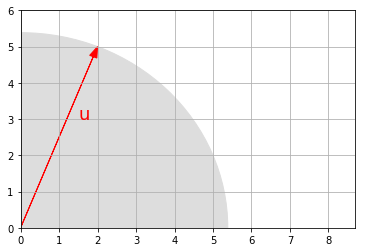

In [151]:
radius = LA.norm(u)
plt.gca().add_artist(
    plt.Circle((0,0), radius, color="#DDDDDD")
)
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.text(1.5, 3, 'u', color='r', fontsize=18)
plt.grid()
plt.show()

## Zero, unit and normalized vectors
* **zero-vector** 는 모든 원소가 0인 벡터
* **unit vector** 는 길이(norm)가 1인 벡터
* $\textbf{u}$의 **normalized vector** 는 $\hat{\textbf{u}}$로 쓰고 $\textbf{u}$와 방향은 같은 unit vector이다. 이는 다음 식과 같다;
$$\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$$

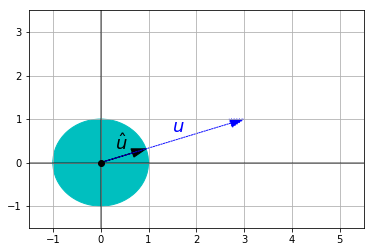

In [152]:
plt.axhline(color='k', alpha=.5)
plt.axvline(color='k', alpha=.5)
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Dot product
### Definition
- $\textbf{u}$ 와 $\textbf{v}$의 dot product는 선대에서 유용한 계산이다. 
- 이는 $\textbf{u} \cdot \textbf{v},\;⟨\textbf{u}|\textbf{v}⟩,\;(\textbf{u}|\textbf{v})$와 같이 표시하며 계산은 다음과 같다
$$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$$

$$where\;\theta\;is\;the\;angle\;between\;\textbf{u}\;and\;\textbf{v}$$

다음과 같이 계산하기도 한다.

$$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$$

### In python
The dot product is pretty simple to implement:

In [180]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

위의 함수를 Numpy의 `dot` 함수를 사용하여 더 빠르게 구할 수 있다.

In [181]:
np.dot(u,v)

11

이를 `ndarray`의 `dot`메서드를 활용해서도 구할 수 있다.

In [183]:
u.dot(v)

11

**Caution**: `*` 연산은 *elementwise multiplication*으로 이루어지고, 이는 dot product와 *같지 않다!*

In [184]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

### Main properties of Dot product
- dot product는 **commutative**이다: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$
- dot product는 오직 두 벡터에서만 정의된다. 이 말은 연쇄적으로 dot product를 수행할 수 없다. $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$에서 $\textbf{u} \cdot \textbf{v}$는 내적이 수행된 scalar이기 때문에 위와 같은 식은 정의될 수 없다.
- dot product는 **associative**가 **아니다**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ 


### Main properties
* This also means that the dot product is **NOT associative**: since neither are defined.
* However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Finally, the dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

In [ ]:
def forloop_sum():
    res = 0
    for i in range(1, 10001):
        res += i

def inner_product():
    a = np.ones(10000)
    b = np.arange(1, 10001)
    a.dot(b)
    
%timeit forloop_sum()
%timeit inner_product()

c:\users\affinity\.conda\envs\ds\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


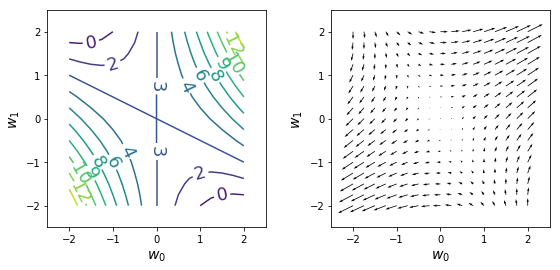

In [179]:
def f(w0, w1):
    return w0**2 + 2 * w0 * w1 + 3
def df_dw0(w0, w1):
    return 2 * w0 + 2 * w1
def df_dw1(w0, w1):
    return 2 * w0 + 0 * w1

w_range = 2
dw = .25
w0 = np.arange(-w_range, w_range + dw, dw)
w1 = np.arange(-w_range, w_range + dw, dw)
wn = w0.shape[0]
ww0, ww1 = np.meshgrid(w0, w1)
ff, dff_dw0, dff_dw1 = np.zeros((3, len(w0), len(w1)))
for i0 in range(wn):
    for i1 in range(wn):
        ff[i1, i0] = f(w0[i0], w1[i1])
        dff_dw0[i1, i0] = df_dw0(w0[i0], w1[i1])
        dff_dw1[i1, i0] = df_dw1(w0[i0], w1[i1])

plt.figure(figsize=(9, 4))

plt.subplots_adjust(wspace=.3)
plt.subplot(1, 2, 1)
cont = plt.contour(ww0, ww1, ff, 10, color='k')
cont.clabel(fmt='%.0f', fontsize=18)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - .5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
          
plt.subplot(1, 2, 2)
plt.quiver(ww0, ww1, dff_dw0,dff_dw1)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - .5, w_range + .5)
plt.ylim(-w_range - .5, w_range + .5)

plt.show()

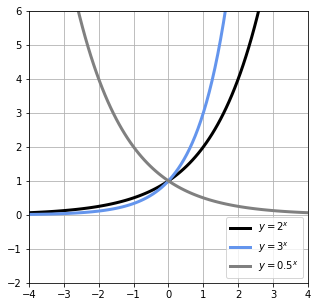

In [227]:
x = np.linspace(-4, 4, 100)
y = 2 ** x
y2 = 3 ** x
y3 = .5 ** x

plt.figure(figsize=(5, 5))
plt.plot(x, y, 'k', linewidth=3, label='$y=2^x$')
plt.plot(x, y2, 'cornflowerblue', linewidth=3, label='$y=3^x$')
plt.plot(x, y3, 'gray', linewidth=3, label='$y=0.5^x$')

plt.xlim(-4, 4)
plt.ylim(-2, 6)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

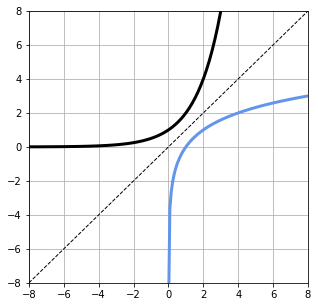

In [236]:
x = np.linspace(-8, 8, 100)
y = 2**x
x2 = np.linspace(.001, 8, 100)
y2 = np.log2(x2)

plt.figure(figsize=(5,5))
plt.plot(x, y, 'k', linewidth=3)
plt.plot(x2, y2, 'cornflowerblue', linewidth=3)
plt.plot(x, x, 'k', ls='--', lw=1)
plt.axis([-8,8,-8,8])
plt.grid(True)
plt.show()

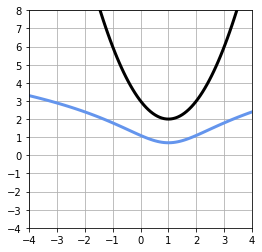

In [238]:
x = np.linspace(-4, 4, 100)
y = (x - 1) ** 2 + 2
logy = np.log(y)

plt.figure(figsize=(4,4))
plt.plot(x, y ,'k', lw=3)
plt.plot(x, logy, 'cornflowerblue', lw=3)
plt.xticks(range(-4, 5, 1))
plt.yticks(range(-4, 9, 1))
plt.axis([-4, 4, -4, 8])
plt.grid(True)
plt.show()

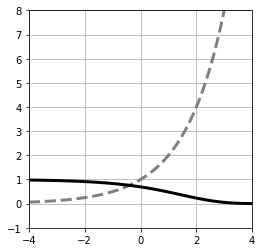

In [239]:
x = np.linspace(-4, 4, 100)
a = 2
y = a ** x
dy = np.log(a) ** y

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'gray', ls='--', lw=3)
plt.plot(x, dy, 'k', lw=3)
plt.axis([-4, 4, -1, 8])
plt.grid(True)
plt.show()

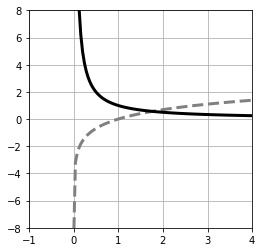

In [240]:
x = np.linspace(.0001, 4, 100)
y = np.log(x)
dy = 1 / x

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'gray', ls='--', lw=3)
plt.plot(x, dy, 'k', lw=3)
plt.axis([-1, 4, -8, 8])
plt.grid(True)
plt.show()

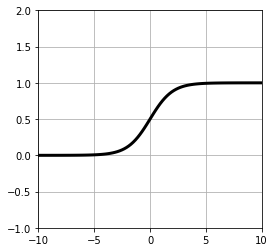

In [241]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'k', lw=3)
plt.axis([-10, 10, -1, 2])
plt.grid(True)
plt.show()

In [242]:
def softmax(class_li):
    res = list(map(np.exp, class_li))
    return res / sum(res)

In [252]:
y = softmax([2, 1, -1])
y

array([0.70538451, 0.25949646, 0.03511903])

In [253]:
np.round(y, 2)

array([0.71, 0.26, 0.04])

In [254]:
np.sum(y)

1.0

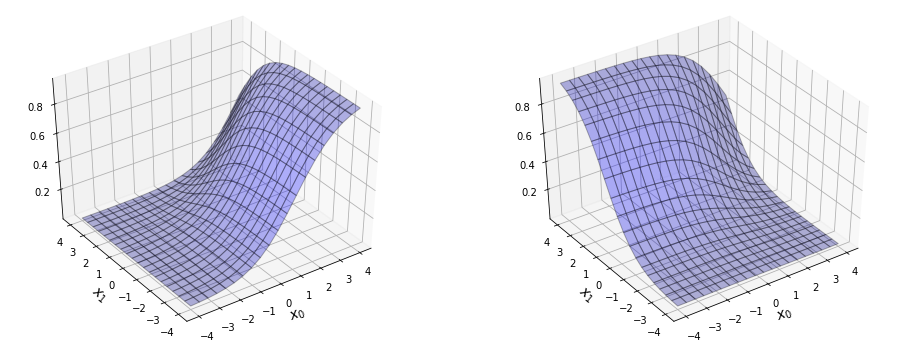

In [273]:
from mpl_toolkits.mplot3d import Axes3D

xn = 20
x0 = np.linspace(-4, 4, xn)
x1 = np.linspace(-4, 4, xn)

y = np.zeros((xn, xn, 3))
for i0 in range(xn):
    for i1 in range(xn):
        y[i1, i0, :] = softmax([x0[i0], x1[i1], 1])
        
xx0, xx1 = np.meshgrid(x0, x1)
plt.figure(figsize=(16, 6))
for i in range(2):
    ax = plt.subplot(1, 2, i + 1, projection='3d')
    ax.plot_surface(xx0, xx1, y[:, :, i],
                   rstride=1, cstride=1, alpha=.3,
                   color='blue', edgecolor='black')
    ax.set_xlabel('$x_0$', fontsize=14)
    ax.set_ylabel('$x_1$', fontsize=14)
    ax.view_init(40, -125)
plt.show()

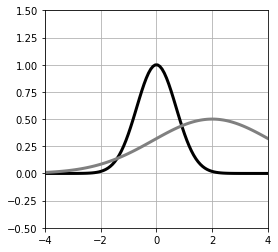

In [276]:
def gauss(mu, sigma, a):
    return a * np.exp(-(x - mu)**2 / sigma ** 2)

x = np.linspace(-4, 4, 100)
plt.figure(figsize=(4, 4))
plt.plot(x, gauss(0, 1, 1), 'k', lw=3)
plt.plot(x, gauss(2, 3, .5), 'gray', lw=3)
plt.axis([-4, 4, -.5, 1.5])
plt.grid(True)
plt.show()

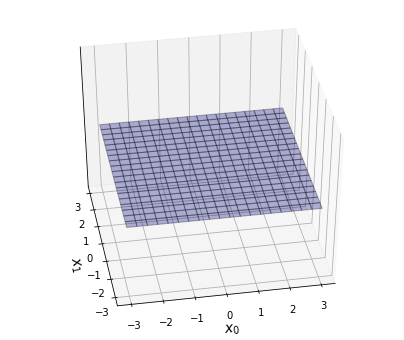

In [330]:
def get_2D_gauss(x0, x1, mu=0, sigma=1):
    return np.exp(-(x0 ** 2 + x1 ** 2))

xn = 20
x0 = np.linspace(-3, 3, xn)
x1 = np.linspace(-3, 3, xn)
xx0, xx1 = np.meshgrid(x0, x1)
z_ = np.array([get_2D_gauss(i[0], i[1]) for i in np.c_[xx0, xx1]]).reshape(xn, -1)

Fig = plt.figure(1, figsize=(7, 6))
Ax = Fig.add_subplot(1, 1, 1, projection='3d')
Ax.plot_surface(xx0, xx1, z_,
                  rstride=1, cstride=1, alpha=.3,
                  color='blue', edgecolor='black')
Ax.set_zticks([.05, .10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()

In [292]:
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi) ** (D / 2)
    c2 = 1 / (LA.det(sigma) ** .5)
    inv_sigma = LA.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 += c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

x = np.array(
    [[1, 2],
     [2, 1],
     [3, 4]]
)
mu = np.array([1, 2])
sigma = np.array(
    [[1, 0],
     [0, 1]]
)
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


c:\users\affinity\.conda\envs\ds\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


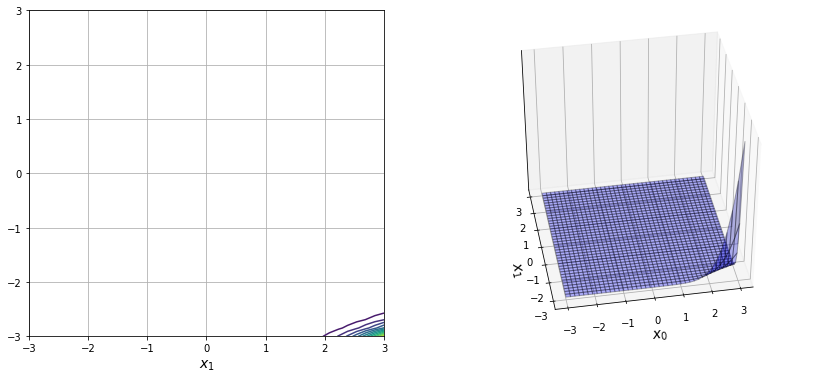

In [335]:
X_range0 = [-3, 3]
X_range1 = [-3, 3]

# 등고선 표시 -------------------------------------
def show_contour_gauss(mu, sig):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = gauss(x, mu, sig).reshape(xn, xn).T
    cont= plt.contour(xx0, xx1, f, 15, color='k')
#     cont= plt.contour(x0, x1, f, 15, color='k')
    plt.grid(True)

# 3D 표시 -----------------------------------------
def show3d_gauss(ax, mu, sig):
    xn = 40
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = gauss(x, mu, sig).reshape(xn, xn).T
    ax.plot_surface(xx0, xx1, f,
                  rstride=1, cstride=1, alpha=.3,
                  color='blue', edgecolor='black')


# 메인 --------------------------------------------
# mu = np.array([1, .5])
# sigma = np.array(
#     [[2, 1],
#      [1, 1]]
# )
mu = np.array([5, -9])
sigma = np.array([
    [1, 0],
    [0, 1]
])
Fig = plt.figure(1, figsize=(14, 6))
Fig.add_subplot(1, 2, 1)
show_contour_gauss(mu, sigma)
# plt.xlim(X_range0)
# plt.ylim(X_range1)
plt.xlabel('$x_0$', fontsize=14)
plt.xlabel('$x_1$', fontsize=14)
Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([.05, .10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()